# Proyecto de empresa aliada  == Entregable 4 == 
 * Carga los datos
 * Identificar variables clave
 * Visualizar la distribución de ventas
 * Analizar la tendencia de ventas en el tiempo
 * Explorar la relación entre diferentes variables
 * Visualizar la distribución geográfica de las ventas
 * Identificar posibles outliers y anomalías
 * Documentar los insights obtenidos


In [1]:
#Comienzo importando las librerias y el archivo
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('/Users/Beto/EBAC/Proyecto de empresa aliada')

In [2]:
# Leo El archivo
df = pd.read_excel('DM_PRODUCT_FACT_FECHA.xlsx')

In [3]:
# Leo la cabecera
df.head(3)

,WEEK,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3,SEGMENT,CATEGORY_NAME,YEAR,MONTH,WEEK_NUMBER,DATE
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER,FABRIC TREATMENT AND SANIT,2022,8,34,2022-08-28
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8KG,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER,FABRIC TREATMENT AND SANIT,2022,8,34,2022-08-28
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER,FABRIC TREATMENT AND SANIT,2022,8,34,2022-08-28


In [4]:
# Reviso el tamaño de los datos
df.shape

(122002, 20)

In [5]:
# Reviso los tipos de datos en el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   WEEK                         122002 non-null  object        
 1   ITEM                         122002 non-null  object        
 2   TOTAL_UNIT_SALES             122002 non-null  float64       
 3   TOTAL_VALUE_SALES            122002 non-null  float64       
 4   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64       
 5   REGION                       122002 non-null  object        
 6   MANUFACTURER                 122002 non-null  object        
 7   BRAND                        122002 non-null  object        
 8   ITEM_DESCRIPTION             122002 non-null  object        
 9   CATEGORY                     122002 non-null  int64         
 10  FORMAT                       122002 non-null  object        
 11  ATTR1                     

In [6]:
# Cambiare algun tipo de dato
df['DATE'] = pd.to_datetime(df['DATE'])
df['TOTAL_VALUE_SALES'] = pd.to_numeric(df['TOTAL_VALUE_SALES'], errors='coerce')
df['TOTAL_UNIT_SALES'] = pd.to_numeric(df['TOTAL_UNIT_SALES'], errors='coerce')

In [7]:
df.sample(4).T

,15308,17479,8578,32763
WEEK,38-22,30-22,28-22,20-22
ITEM,4008455567013,7501025401993,7501071907722,7501080900585
TOTAL_UNIT_SALES,0.652,2.465,0.0,0.08
TOTAL_VALUE_SALES,14.511,78.038,0.002,21.608
TOTAL_UNIT_AVG_WEEKLY_SALES,5.77,23.702,0.182,1.667
REGION,TOTAL AUTOS AREA 2,TOTAL AUTOS SCANNING MEXICO,TOTAL AUTOS AREA 6,TOTAL AUTOS AREA 3
MANUFACTURER,DELTA PRONATURA,INDS. ALEN,CLOROX,CHURCH & DWIGHT
BRAND,DR.BECKMANN,BLANCATEL,CLOROX,OXI CLEAN
ITEM_DESCRIPTION,DR BECKMANN QUITAMANCHAS INTENSO ROPABLANCAYCO...,BLANCATEL CONCENTRADO BOT PLAST 3750ML NAL,CLOROX ANTISPLASH BLANQ+DET GEL FLORES DE LAVA...,OXI CLEAN SANITIZER QUITAMANCHAS ROPA AROMA FR...
CATEGORY,1,1,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   WEEK                         122002 non-null  object        
 1   ITEM                         122002 non-null  object        
 2   TOTAL_UNIT_SALES             122002 non-null  float64       
 3   TOTAL_VALUE_SALES            122002 non-null  float64       
 4   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64       
 5   REGION                       122002 non-null  object        
 6   MANUFACTURER                 122002 non-null  object        
 7   BRAND                        122002 non-null  object        
 8   ITEM_DESCRIPTION             122002 non-null  object        
 9   CATEGORY                     122002 non-null  int64         
 10  FORMAT                       122002 non-null  object        
 11  ATTR1                     

In [9]:
# Reviso si hay datos nulos de los datos que son importantes
# Vamos a ver el numero de datos vacios por cada columna
missing_values_count = df.isnull().sum()
missing_values_count[0:20]

WEEK                           0
ITEM                           0
TOTAL_UNIT_SALES               0
TOTAL_VALUE_SALES              0
TOTAL_UNIT_AVG_WEEKLY_SALES    0
REGION                         0
MANUFACTURER                   0
BRAND                          0
ITEM_DESCRIPTION               0
CATEGORY                       0
FORMAT                         0
ATTR1                          0
ATTR2                          0
ATTR3                          0
SEGMENT                        0
CATEGORY_NAME                  0
YEAR                           0
MONTH                          0
WEEK_NUMBER                    0
DATE                           0
dtype: int64

In [10]:
df.describe()

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,CATEGORY,YEAR,MONTH,WEEK_NUMBER,DATE
count,122002.000000,122002.000000,122002.000000,122002.0,122002.000000,122002.000000,122002.000000,122002
mean,3.211097,90.513761,10.099904,1.0,2022.334396,5.531729,22.141194,2022-10-06 01:01:51.598170368
min,0.000000,0.001000,0.042000,1.0,2022.000000,1.000000,1.000000,2022-01-09 00:00:00
25%,0.063000,2.662000,2.316000,1.0,2022.000000,3.000000,10.000000,2022-05-15 00:00:00
50%,0.367000,16.812000,3.993500,1.0,2022.000000,5.000000,20.000000,2022-10-02 00:00:00
75%,1.520000,62.961500,8.898000,1.0,2023.000000,8.000000,32.000000,2023-02-27 00:00:00
max,504.681000,12236.759000,794.000000,1.0,2023.000000,12.000000,52.000000,2023-07-17 00:00:00
std,14.496009,350.236505,22.650142,0.0,0.471781,3.214612,14.134943,NaN


In [11]:
# Cuales son los años de los cuales tengo datos
df['YEAR'].unique()

array([2022, 2023])

# Hallazgos hasta ahora
 * Tenemos un total de 122,002 registros y un total de 20 columnas
 *  Se incluyen las ventas de los años 2022 y 2023
 * No Existen valores nulos en la tabla (ya se habia limpiado anteriormente)
# Identificacion de las variables clave
 * Métricas de Desempeño: TOTAL_VALUE_SALES (Ventas en valor) y TOTAL_UNIT_SALES (Volumen).
 * Dimensiones Temporales: DATE, YEAR, MONTH.
 * Dimensiones de Producto: BRAND, ITEM_DESCRIPTION, SEGMENT.
 * Dimensión Geográfica: REGION.

# Visualizacion y distribucion de Outliers

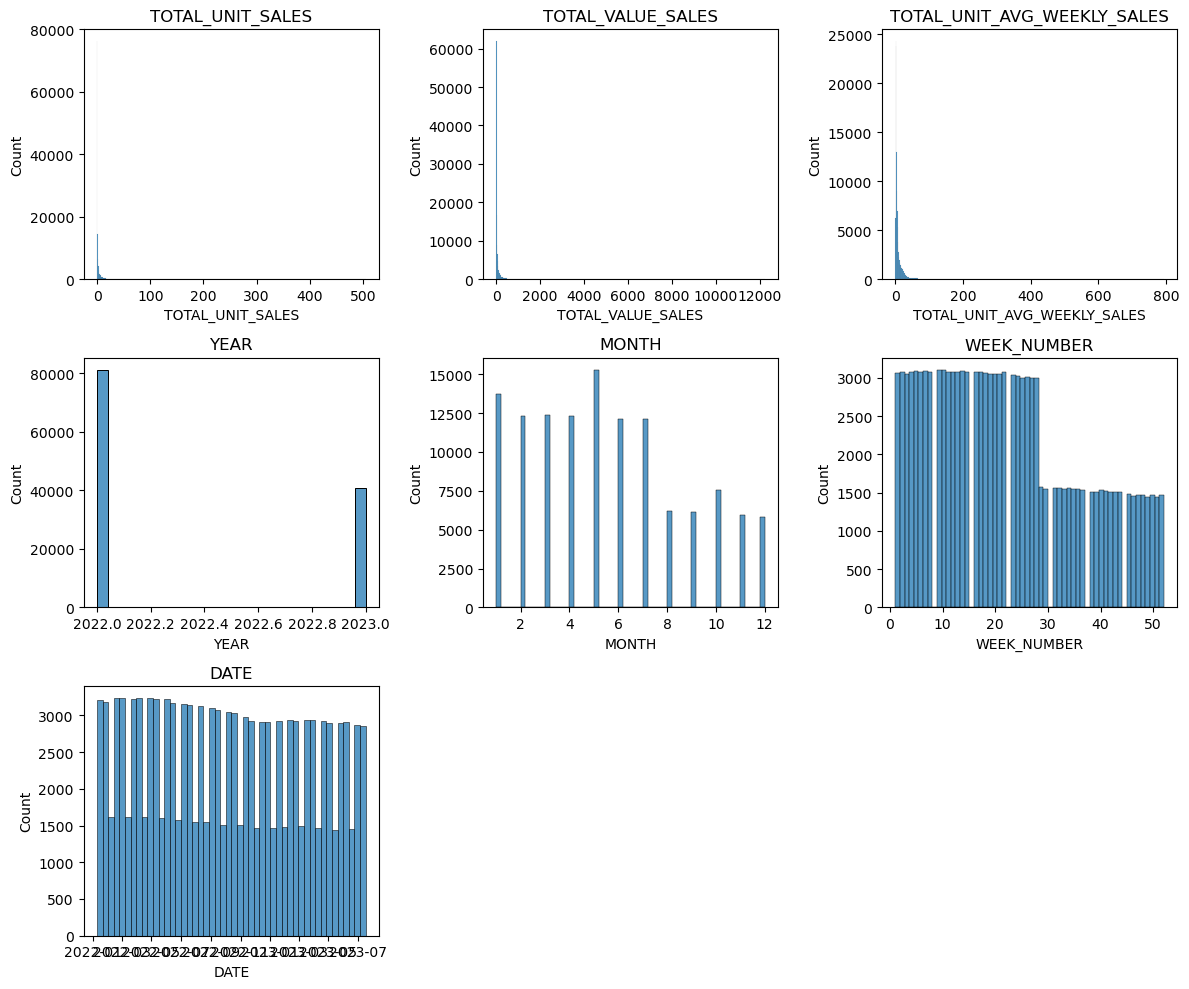

<Figure size 640x480 with 0 Axes>

In [ ]:
# Grafica exploratoria de todas las columnas

# Separo Numero de columnas numericas
cols_num = ['TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES', 'TOTAL_UNIT_AVG_WEEKLY_SALES', 'YEAR',
       'MONTH', 'WEEK_NUMBER', 'DATE']

# Creamos la cuadrícula de 3x3 (12 espacios)
# Se Crea la figura
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))
axes_flat = axes.flatten()

# 3. El bucle corregido
for i, column in enumerate(cols_num):
    # Verificamos que la columna exista realmente en el DataFrame
    if column in df.columns:
        sns.histplot(data=df, x=column, ax=axes_flat[i], kde=False)
        axes_flat[i].set_title(column)
    else:
        print(f"Advertencia: La columna '{column}' no existe en el DataFrame")

# 4. Limpieza de cuadros vacíos
for j in range(len(cols_num), len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()


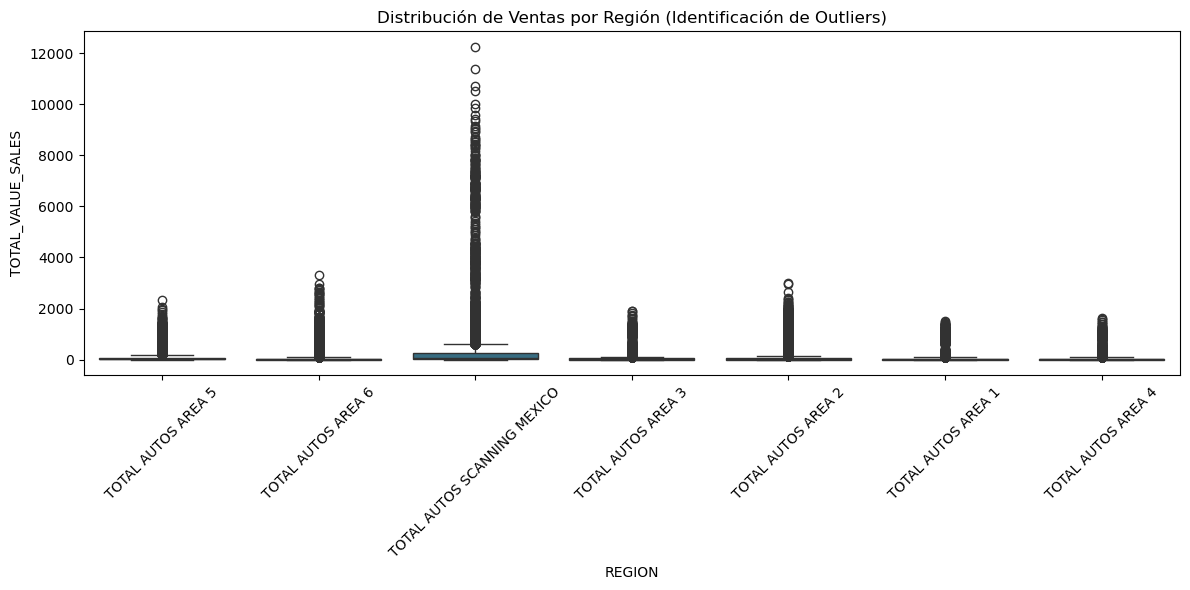

In [15]:
# Visualización de la distribución de ventas y outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='REGION', y='TOTAL_VALUE_SALES', data=df, hue='REGION', palette='viridis', legend=False)
plt.title('Distribución de Ventas por Región (Identificación de Outliers)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ventas_boxplot_region.png')

# Insigths: 
  * Se observan puntos aislados muy por encima del promedio en regiones específicas (como "TOTAL AUTOS SCANNING MEXICO").

  * Sesgo: La mayoría de las transacciones son de bajo valor, con una cola larga hacia la derecha (distribución sesgada positivamente).

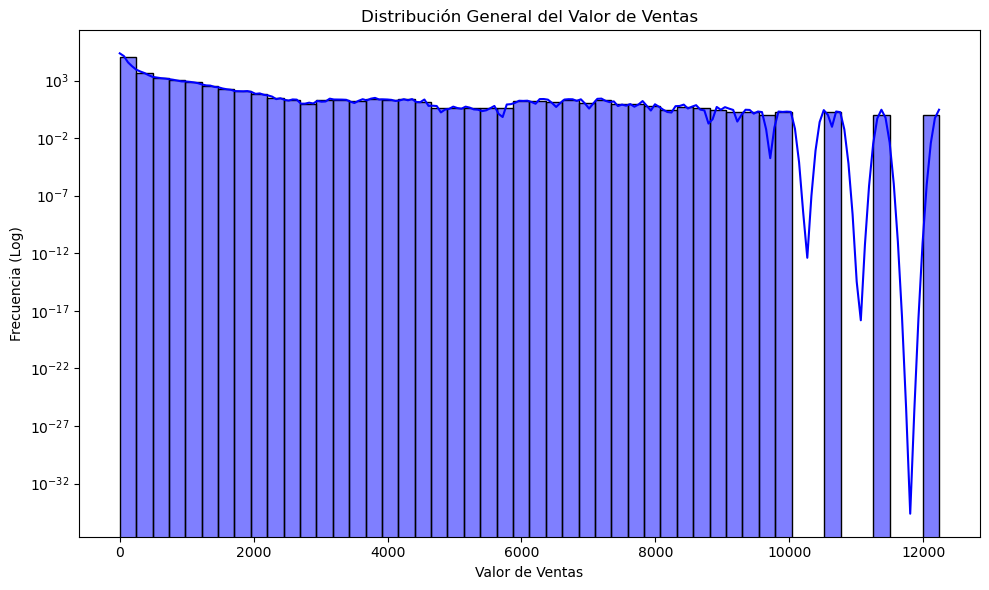

In [ ]:
# Grafica para sacar la distribucion de las ventas
# Tuve que usar una escala logartimica para la dispercion
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL_VALUE_SALES'], bins=50, kde=True, color='blue')
plt.title('Distribución General del Valor de Ventas')
plt.yscale('log') # Escala logarítmica por la alta dispersión
plt.xlabel('Valor de Ventas')
plt.ylabel('Frecuencia (Log)')
plt.tight_layout()
plt.savefig('ventas_distribucion_hist.png')

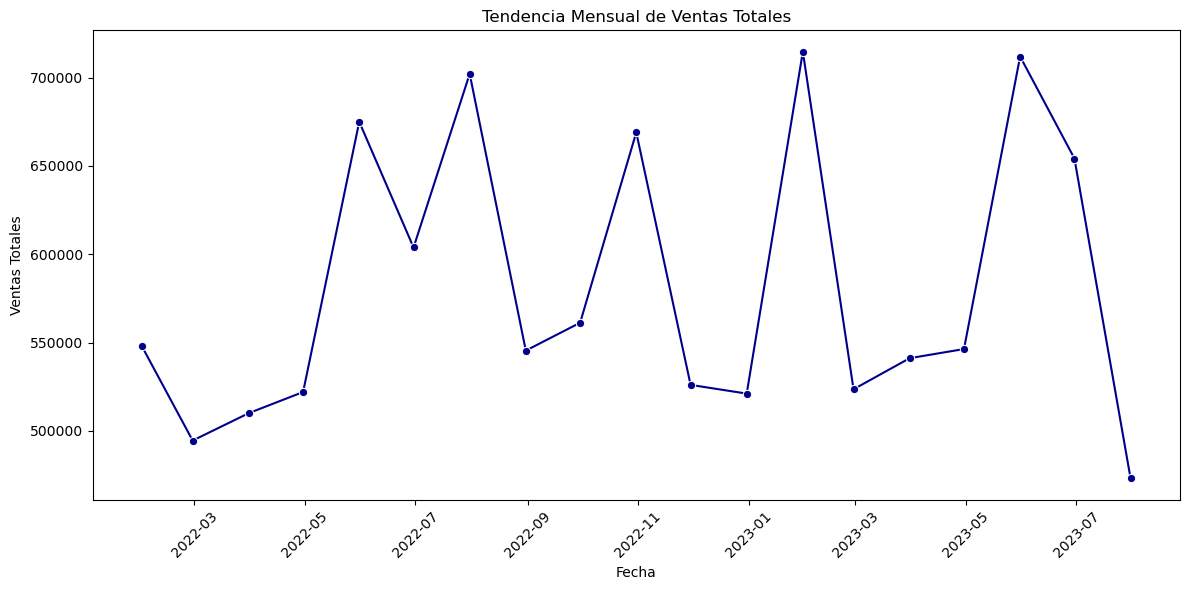

In [18]:
# Grafica para sacar la tendencia mensuaal de las ventas
# Utilice la funcion de agupamiento grouper que sirve para agupar series temporales
df_time = df.groupby(pd.Grouper(key='DATE', freq='ME'))['TOTAL_VALUE_SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='TOTAL_VALUE_SALES', data=df_time, marker='o', color='darkblue')
plt.title('Tendencia Mensual de Ventas Totales')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('tendencia_temporal.png')

# Insigths
 * Crecimiento/Caidas: El gráfico permite identificar si hay una tendencia al alza hacia finales de año o si existen caídas drásticas en meses específicos.

 * Estabilidad: Existe una linea con muchas altas y bajas, podria deberse a temporalidades o promociones en meses especificos

# Relación entre las variables

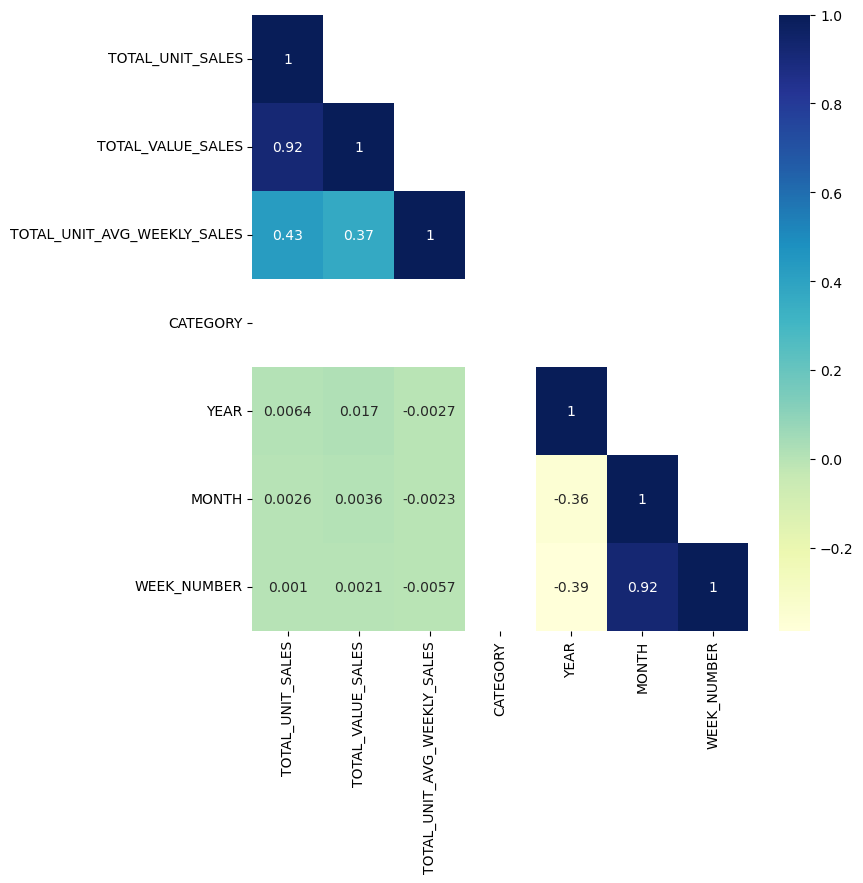

In [24]:
# Saco un grafico para ver la correlacion de las variables del DataFrame
plt.figure(figsize=(8,8))
corr_df = df.select_dtypes(include=[np.number]).corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap="YlGnBu", annot=True)
plt.savefig('Correlacion_Total_entre_variables.png')

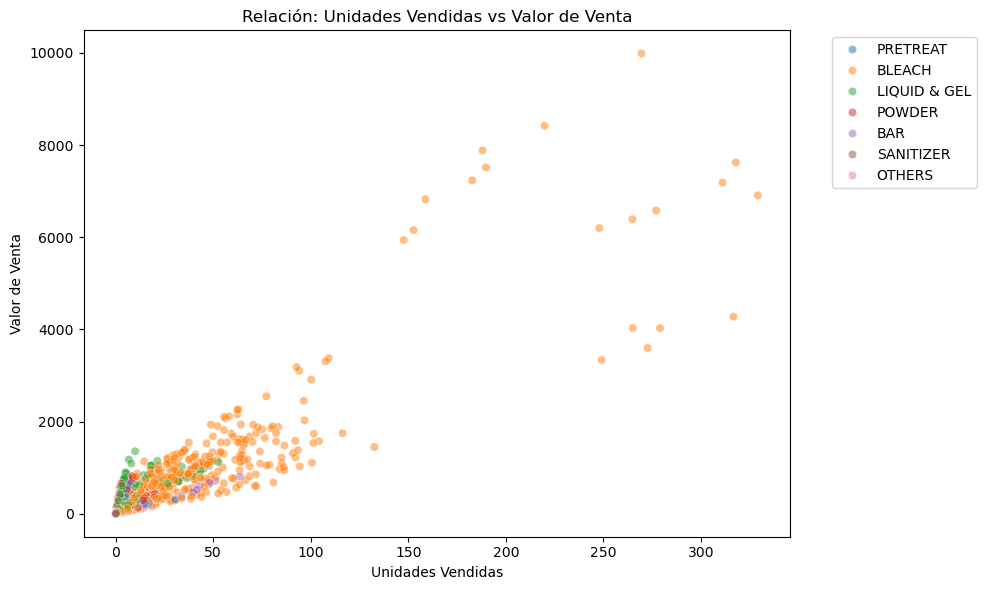

In [25]:
# Voy a sacar la relacion entre las unidades vendidas vs el valor de la venta
# Ya que estas 2 variables muestran una alta correlacion .92
plt.figure(figsize=(10, 6))
sample_df = df.sample(n=min(10000, len(df)), random_state=42)
sns.scatterplot(x='TOTAL_UNIT_SALES', y='TOTAL_VALUE_SALES', hue='SEGMENT', alpha=0.5, data=sample_df)
plt.title('Relación: Unidades Vendidas vs Valor de Venta')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Valor de Venta')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('relacion_unidades_valor.png')

# Insigths
 * Correlación: Existe una correlación lineal fuerte, pero la pendiente varía según el SEGMENT.

 * Los datos tienden a agruparse en la zona baja, lo que indica que el volumen masivo proviene de productos de ticket promedio bajo.

# Distibución Geofrafica

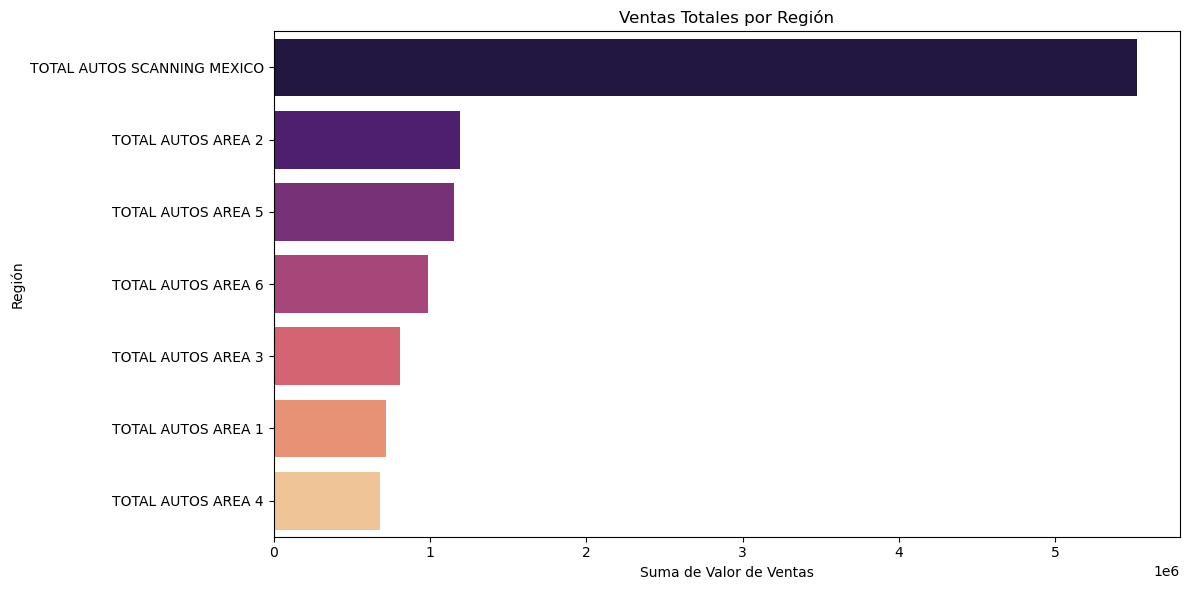

In [33]:
# Voy a sacar las ventas Totales por region
region_ranking = df.groupby('REGION')['TOTAL_VALUE_SALES'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='TOTAL_VALUE_SALES', y='REGION', data=region_ranking, hue='REGION', palette='magma')
plt.legend([], [], frameon=False)
plt.title('Ventas Totales por Región')
plt.xlabel('Suma de Valor de Ventas')
plt.ylabel('Región')
plt.tight_layout()
plt.savefig('ventas_por_region.png')

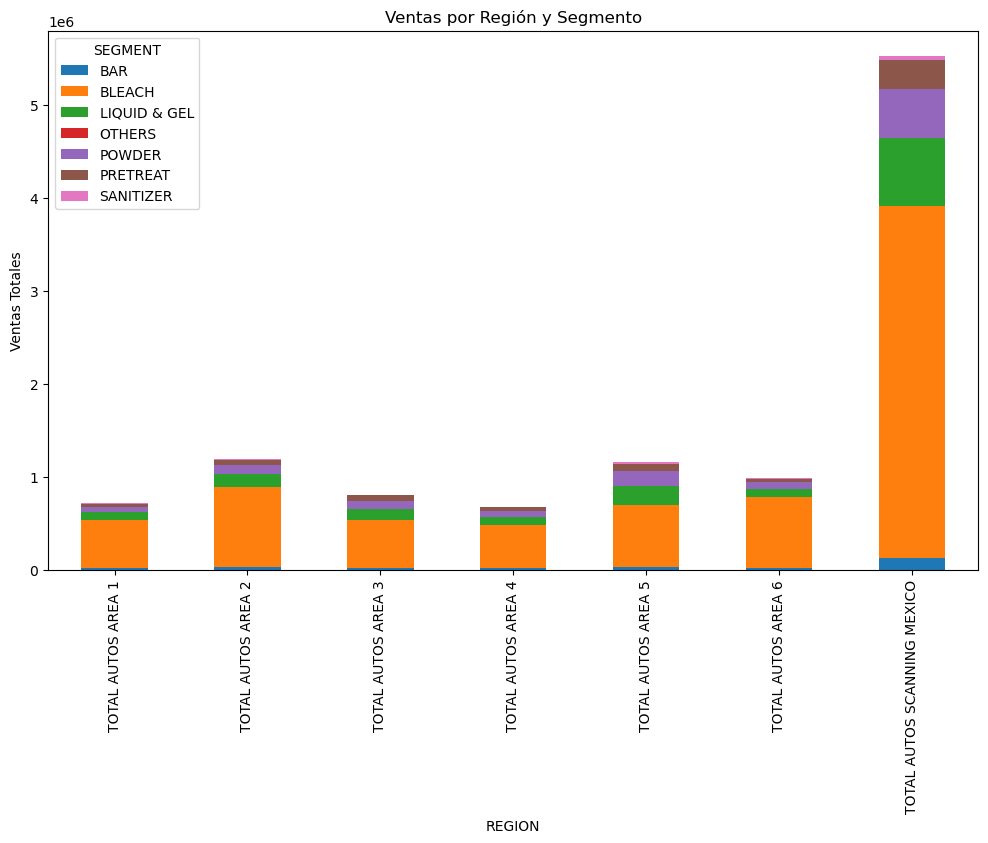

<Figure size 640x480 with 0 Axes>

In [28]:
# Voy a sacar las ventas Totales por region
region_sales = df.groupby(['REGION', 'SEGMENT'])['TOTAL_VALUE_SALES'].sum().unstack()
region_sales.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Ventas por Región y Segmento')
plt.ylabel('Ventas Totales')
plt.show()
plt.savefig('ventas_por_region_segmento.png')

# Insights

 * Concentración: Generalmente, la región "TOTAL AUTOS SCANNING MEXICO" concentra el mayor volumen, indicando que es el canal principal.

 * Mix de Producto: Algunas regiones tienen una mayor penetración de ciertos segmentos (ej. "POWDER" vs "LIQUID"), con lo cual se puede hacer una estrategia de manejo de inventarios por region.

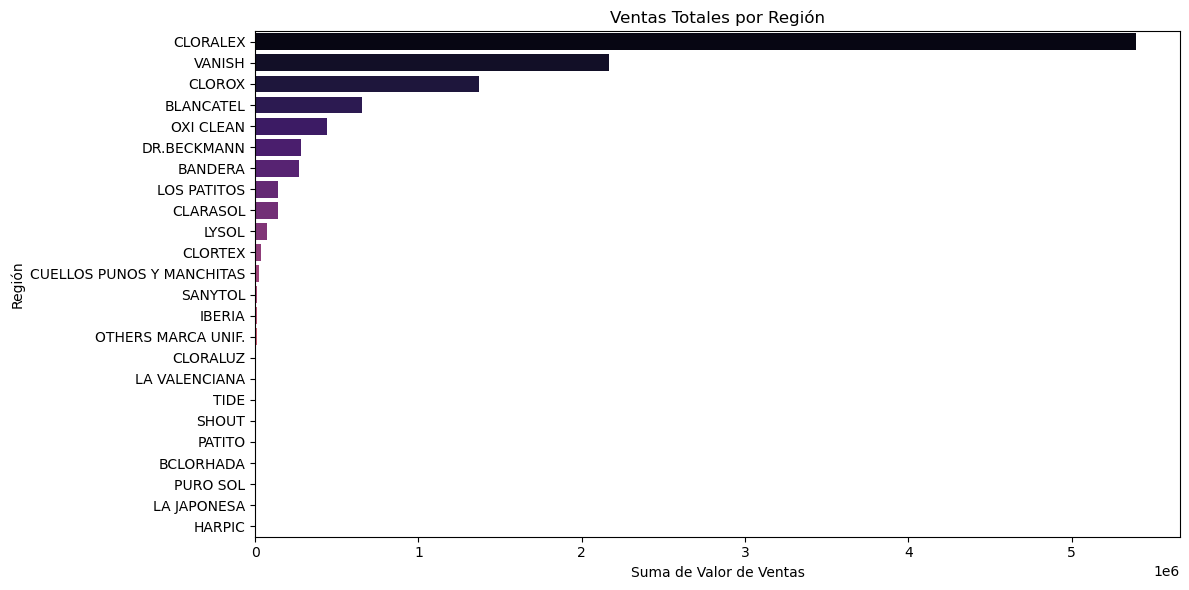

In [34]:
region_ranking = df.groupby('BRAND')['TOTAL_VALUE_SALES'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='TOTAL_VALUE_SALES', y='BRAND', data=region_ranking, hue='BRAND', palette='magma')
plt.legend([], [], frameon=False)
plt.title('Ventas Totales por Región')
plt.xlabel('Suma de Valor de Ventas')
plt.ylabel('Región')
plt.tight_layout()
plt.savefig('ventas_por_region_brand.png')

# Insights

 * Por lo que se puede ver el lider del mercado es Cloralex.

 * Mix de Producto: Algunas regiones tienen una mayor penetración de ciertos segmentos (ej. "POWDER" vs "LIQUID"), con lo cual se puede hacer una estrategia de manejo de inventarios por region.